### N01: Data Creation, Exploration & Cleaning

The purpose of this notebook is to:<br>
1. Create a fake/artificial dataset
2. Explore the data
3. Clean and prepare the data for further analysis

Please refer to the <b><a href="https://github.com/pbquandt/Exploring_Random_Property_Markets/blob/master/README.md">README.md</a></b> document for more information.

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from faker import Faker
from datetime import datetime

###
## PART 1: Creating Fake / Artificial Data

In [2]:
# determining size of the dataset

num_rows = 10000

In [3]:
# random choice of the country to work on

locales = ['en_GB', 'tr_TR', 'no_NO', 'de_DE', 'pl_PL', 'da_DK', 'fr_FR', 'ro_RO', 'el_GR', 'pt_PT']
ran_loc = random.choice(locales)

In [4]:
# applying 'faker' library 

fake = Faker(ran_loc)

#### Creating Cities

In [5]:
city_set = []
for i in range(30):
    city = fake.city()
    city_set.append(city)

#### Creating Categories

In [6]:
category_set = []
for i in range (0, num_rows):
    category = fake.random_element(elements=("Apartment", "Private Room", "Studio", "Shared Room"))
    category_set .append(category)

#### Creating Prices

In [7]:
def prices(x, y, z):
    price_set = []
    for i in range(x):
        price = fake.pyfloat(left_digits=None, right_digits=2, positive=0, min_value=y, max_value=z)
        price_set.append(price)

    return price_set

In [8]:
price_set_10 = prices(300, 0, 100)            # ultra-low prices
price_set_100 = prices(2000, 100, 400)        # lower quartile
price_set_1000 = prices(3500, 400, 1000)      # middle band
price_set_5000 = prices(3000, 1000, 5000)     # upper quartile
price_set_50000 = prices(200, 5000, 50000)    # rare high-end
price_set_100000 = prices(2, 50000, 200000)   # single extreme outlier

In [9]:
price_set = price_set_10 + price_set_100 + price_set_1000 + price_set_5000 + price_set_50000 + price_set_100000

#### Creating Sizes

In [10]:
def sizes(x, y, z):
    size_set = []
    for i in range(x):
        size = fake.random_int(min=y, max=z)
        size_set.append(size)

    return size_set

In [11]:
size_set_10 = sizes(300, 0, 20)          # very small (1–20)
size_set_50 = sizes(1000, 20, 70)        # lower quartile
size_set_100 = sizes(2000, 70, 120)      # middle range
size_set_200 = sizes(900, 120, 250)      # larger sizes
size_set_1000 = sizes(200, 250, 1000)    # rare large
size_set_10000 = sizes(89, 1000, 10000)  # extreme outliers (match 99th–max)

In [12]:
size_set_num = size_set_10 + size_set_50 + size_set_100 + size_set_200 + size_set_1000 + size_set_10000

In [13]:
size_set_str = list(map(str, size_set_num))

In [14]:
# adding blanks

size_set_null = ["null"] * 700
size_set_empty = [""] * 301

In [15]:
size_set = size_set_str + size_set_null + size_set_empty

#### Creating Dates

In [16]:
date_set = []
for i in range(num_rows):
    date_time = fake.date_time_between_dates(
        datetime_start=datetime(2013, 1, 1, 0, 0, 0),
        datetime_end=datetime(2017, 12, 31, 23, 59, 59)
    ).replace(microsecond=0)
    date_set.append(date_time)

#### Creating Additional Values

In [17]:
add_set_1 = []
for i in range (0, num_rows):
    add_1 = fake.random_element(elements=("", "yes", "no"))
    add_set_1.append(add_1)

In [18]:
add_set_2 = []
for i in range (0, num_rows):
    add_2 = fake.random_element(elements=("", "no", "private", "shared"))
    add_set_2.append(add_2)

#### Populating and modifying dataset

In [19]:
def pad_list(lst, num_rows):
    return lst + [None] * (num_rows - len(lst))

In [20]:
city = [
    random.choice(city_set) if random.random() < 0.952 else None
    for _ in range(num_rows)
]

category = [
    random.choice(category_set) if random.random() < 0.950 else None
    for _ in range(num_rows)
]

country_code = ran_loc[:2]

created_at = [
    random.choice(date_set)
    for _ in range(num_rows)
]

price = [
    random.choice(price_set)
    for _ in range(num_rows)
]

total_size = [
    random.choice(size_set) if random.random() < 0.81 else None
    for _ in range(num_rows)
]

furnished = [
    random.choice(add_set_1) if random.random() < 0.954 else None
    for _ in range(num_rows)
]

registration_possible = [
    random.choice(add_set_1) if random.random() < 0.8 else None
    for _ in range(num_rows)
]

washing_machine = [
    random.choice(add_set_1) if random.random() < 0.947 else None
    for _ in range(num_rows)
]

tv = [
    random.choice(add_set_1) if random.random() < 0.951 else None
    for _ in range(num_rows)
]

balcony = [
    random.choice(add_set_1) if random.random() < 0.4 else None
    for _ in range(num_rows)
]

garden = [
    random.choice(add_set_1) if random.random() < 0.938 else None
    for _ in range(num_rows)
]

terrace = [
    random.choice(add_set_1) if random.random() < 0.39 else None
    for _ in range(num_rows)
]

In [21]:
data = {
        "city": city,
        "category": category,
        "country_code": country_code,
        "created_at": created_at,
        "price": price,
        "total_size": total_size,
        "furnished": furnished,
        "registration_possible": registration_possible,
        "washing_machine": washing_machine,
        "tv": tv,
        "balcony": balcony,
        "garden": garden,
        "terrace": terrace
}

In [22]:
df = pd.DataFrame(data)

In [23]:
columns_to_format = [
    "total_size",
    "furnished", 
    "registration_possible", 
    "washing_machine", 
    "tv", 
    "balcony", 
    "garden", 
    "terrace"
]

for col in columns_to_format:
    if df[col] is not None:
        df[col] = '"' + df[col] + '"'

In [24]:
df = df.fillna(value=np.nan)

###
## PART 2: Exploration

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Analyzing Acquired Data</p>

In [25]:
# General Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   9495 non-null   object        
 1   category               9505 non-null   object        
 2   country_code           10000 non-null  object        
 3   created_at             10000 non-null  datetime64[ns]
 4   price                  10000 non-null  float64       
 5   total_size             8088 non-null   object        
 6   furnished              9559 non-null   object        
 7   registration_possible  8020 non-null   object        
 8   washing_machine        9441 non-null   object        
 9   tv                     9507 non-null   object        
 10  balcony                4048 non-null   object        
 11  garden                 9387 non-null   object        
 12  terrace                3944 non-null   object        
dtypes:

In [26]:
# Number of Missing Values

df.isnull().sum()

city                      505
category                  495
country_code                0
created_at                  0
price                       0
total_size               1912
furnished                 441
registration_possible    1980
washing_machine           559
tv                        493
balcony                  5952
garden                    613
terrace                  6056
dtype: int64

In [27]:
# Random Sample

df.sample(10)

,city,category,country_code,created_at,price,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
6663,Afumati,Studio,ro,2016-01-29 21:50:49,764.87,"""159""","""yes""",NaN,"""yes""","""""",NaN,"""no""",NaN
6572,Boldesti-Scaeni,Private Room,ro,2016-07-02 13:09:09,230.73,"""null""","""""","""no""","""no""","""no""",NaN,"""yes""",NaN
3852,Fetesti-Gara,Private Room,ro,2017-12-13 22:43:55,504.20,"""83""","""yes""","""yes""","""yes""","""yes""",NaN,"""yes""","""yes"""
1755,Calafat,Shared Room,ro,2014-05-26 09:24:08,4278.67,"""89""","""""","""yes""",NaN,"""""","""no""","""""",NaN
247,Brad,Shared Room,ro,2013-11-19 17:10:36,1205.43,"""108""","""""","""""","""no""","""""","""yes""","""no""",""""""
3769,Afumati,Private Room,ro,2015-04-22 12:32:21,2351.58,"""249""","""yes""",NaN,"""""","""no""","""no""","""no""",NaN
135,NaN,Apartment,ro,2017-11-07 20:42:37,804.97,"""null""","""no""","""no""","""no""","""yes""",NaN,"""no""",NaN
4905,Rasnov,Apartment,ro,2013-08-23 09:29:44,3914.47,"""null""","""no""","""no""","""yes""","""no""",NaN,"""no""",""""""
5339,Campia Turzii,Shared Room,ro,2013-11-06 18:45:13,210.99,"""10""","""yes""",NaN,"""yes""","""""",NaN,"""no""",NaN
9751,Boldesti-Scaeni,Private Room,ro,2015-09-05 22:13:57,176.37,"""35""","""yes""",NaN,NaN,"""""",NaN,"""no""",""""""


In [28]:
# Looping Through Columns to Inspect Data Types and Values

for col in df.columns:
    print(f"\n--------------------------\n'value_counts' for column: ")
    print(df[col].value_counts(dropna=False))


--------------------------
'value_counts' for column: 
city
Afumati            657
Medgidia           655
NaN                505
Mogosoaia          349
Calafat            340
Rasnov             338
Rosiori de Vede    336
Strehaia           334
Toplita            325
Focsani            324
Targu Frumos       322
Harlau             322
Boldesti-Scaeni    321
Calarasi           319
Lupeni             319
Sovata             315
Barlad             314
Comanesti          314
Prejmer            309
Fetesti-Gara       306
Dabuleni           304
Brad               303
Iernut             302
Calan              302
Titu               298
Pancota            298
Oradea             293
Modelu             291
Campia Turzii      285
Name: count, dtype: int64

--------------------------
'value_counts' for column: 
category
Private Room    2433
Apartment       2412
Studio          2403
Shared Room     2257
NaN              495
Name: count, dtype: int64

--------------------------
'value_counts' for col

####
#### Summary:

The acquired dataset contained a significant number of inconsistencies across multiple dimensions:

- Data types were poorly structured, with most columns stored as object, regardless of whether they contained text, numeric values, or booleans.
- Text fields were inconsistently formatted, appearing either as plain strings or enclosed in quotation marks.
- Numerical columns such as total_size were also stored as strings.
- Missing values were prevalent across several key columns, appearing as NaN or whitespace (" ").
- The total_size and price fields included outliers and logically invalid values (e.g. 1 m² private rooms or 10 000 m² shared rooms).
- The dataset lacked enforced standardization, requiring manual data type conversions, normalization of string fields, and detailed handling of null or corrupted entries.

To prepare the data for analysis, extensive cleaning was necessary, including type conversions, deduplication, normalization of text fields, imputation strategies, and outlier handling.

###
## PART 3: Data Cleaning And Preparing For Further Analysis

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Dropping Unnecessary Columns</p>

In [29]:
df = df.drop('country_code', axis=1)

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Removing Duplicates</p>

In [30]:
# Checking for Duplicates

veryfication_columns = ['created_at', 'city', 'price', 'category', 'total_size']

n_dupes = df.duplicated(subset=veryfication_columns, keep='first').sum()
print(f"There are {n_dupes} duplicated rows.")

There are 0 duplicated rows.


In [31]:
# Dropping Duplicates

df = df.drop_duplicates(subset=veryfication_columns, keep='first')

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Changing Data Types</p>

In [32]:
# Removing Empty Strings and Whitespace from Data

for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype(str).str.strip('"')

In [33]:
# Changing Data Type to String

strings_to_change = ['city', 'category', 'balcony', 'garden', 'terrace']
df[strings_to_change] = df[strings_to_change].astype("string")

In [34]:
# Changing Data Type to Boolean

bool_to_change = ['furnished', 'registration_possible', 'washing_machine', 'tv']
bool_map = {'yes': True, 'no': False}

for col in bool_to_change:
    df[col] = df[col].str.lower().map(bool_map)
    
df[bool_to_change] = df[bool_to_change].astype("boolean")

In [35]:
# Changing Data Type to Integer

df['total_size'] = (
    df['total_size']
    .astype(str)
    .replace('nan', np.nan)                       
    .replace(r'^\s*$', np.nan, regex=True)
)

df['total_size'] = pd.to_numeric(df['total_size'], errors='coerce')
df['total_size'] = df['total_size'].astype('Int64')

In [36]:
# Converting to Date Format

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

In [37]:
# Verifying Changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   10000 non-null  string        
 1   category               10000 non-null  string        
 2   created_at             10000 non-null  datetime64[ns]
 3   price                  10000 non-null  float64       
 4   total_size             6620 non-null   Int64         
 5   furnished              6395 non-null   boolean       
 6   registration_possible  5334 non-null   boolean       
 7   washing_machine        6366 non-null   boolean       
 8   tv                     6370 non-null   boolean       
 9   balcony                10000 non-null  string        
 10  garden                 10000 non-null  string        
 11  terrace                10000 non-null  string        
dtypes: Int64(1), boolean(4), datetime64[ns](1), float64(1), strin

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Unifying Missing Values</p>

In [38]:
# Replacing All Nulls and Empty Strings with <NA>

common_nulls = ["nan", "nat", "none", "null", "n/a", "missing"]

for col in df.select_dtypes(include='string'):
    df[col] = (
        df[col]
        .replace(common_nulls, pd.NA)                
        .replace(r'^\s*$', pd.NA, regex=True)      
    )

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Removing Non-Usable Entries</p>

Rows lacking both city (and subsequently category) were dropped because they cannot contribute to geographic or categorical analyses. Price was imputed only when both city and category were present, using the city‑category median, which preserves data volume without distorting local price distributions.

In [39]:
n_before = len(df)

# Dropping Rows with Missing City Information
df = df.dropna(subset=['city'])

# Filling Missing Category Values
df['category'] = df['category'].fillna('unknown')

# Imputing Missing Prices Using City–Category Median
price_median = (
    df.groupby(['city','category'])['price']
      .median()
      .rename('city_cat_median')
)

df = df.join(price_median, on=['city','category'])
df['price'] = df['price'].fillna(df['city_cat_median'])
df = df.drop(columns='city_cat_median')

n_after = len(df)
print(f"Removed {n_before - n_after} rows.")

Removed 505 rows.


<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Prices Veryfication</p>

In [40]:
print("Min price:", df['price'].min())
print("Max price:", df['price'].max())

Min price: 0.22
Max price: 166423.95


In [41]:
# Higher than €10000

df[df['price'] > 10000].sort_values(by='price', ascending=False)

,city,category,created_at,price,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
3049,Barlad,Private Room,2016-04-03 11:04:25,166423.95,6,False,<NA>,False,True,<NA>,<NA>,<NA>
4413,Afumati,Studio,2015-04-08 22:57:49,166423.95,<NA>,<NA>,True,True,True,<NA>,yes,yes
2335,Lupeni,Shared Room,2013-11-01 09:39:40,49603.18,104,True,<NA>,True,<NA>,<NA>,yes,<NA>
7161,Rosiori de Vede,Apartment,2017-08-30 02:10:42,49150.66,<NA>,True,<NA>,False,False,<NA>,yes,<NA>
940,Calafat,Studio,2016-07-18 01:44:07,48990.32,82,False,<NA>,True,True,no,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
9618,Medgidia,Apartment,2016-12-07 07:37:00,10787.32,83,<NA>,False,False,True,<NA>,<NA>,<NA>
1601,Oradea,Shared Room,2015-09-26 23:31:45,10153.50,96,True,True,True,<NA>,<NA>,no,yes
3030,Rasnov,Private Room,2015-11-10 04:07:21,10153.50,78,<NA>,<NA>,<NA>,False,<NA>,yes,no
7049,Strehaia,Apartment,2015-07-29 00:35:06,10153.50,215,<NA>,<NA>,<NA>,False,no,no,yes


In [42]:
# Lower than €50

df[df['price'] < 80].sort_values(by='price', ascending=False)

,city,category,created_at,price,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
4708,Boldesti-Scaeni,Apartment,2013-05-08 03:48:43,79.69,<NA>,True,<NA>,False,True,<NA>,no,no
9520,Sovata,Apartment,2014-10-03 00:04:47,79.69,<NA>,False,False,False,False,<NA>,yes,<NA>
2303,Dabuleni,Shared Room,2015-11-08 02:27:49,79.38,103,False,False,False,True,<NA>,no,<NA>
7133,Rosiori de Vede,Shared Room,2017-07-17 16:02:50,79.38,<NA>,<NA>,<NA>,True,<NA>,<NA>,no,<NA>
3289,Medgidia,Studio,2015-04-06 08:11:51,79.38,72,<NA>,True,True,True,<NA>,no,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,Harlau,unknown,2015-08-07 21:25:37,2.32,<NA>,<NA>,True,True,False,<NA>,no,<NA>
4083,Rasnov,Studio,2016-10-31 00:27:55,2.30,83,True,<NA>,<NA>,True,<NA>,<NA>,yes
148,Afumati,Studio,2017-12-11 19:50:29,0.49,60,True,<NA>,<NA>,True,yes,yes,<NA>
9030,Titu,Apartment,2013-07-04 07:11:34,0.22,687,<NA>,False,False,False,yes,<NA>,<NA>


In [43]:
# Dropping Rows with Unrealistic Prices

df = df.drop(df[df['price'] > 12000].index)
df = df.drop(df[df['price'] < 100].index)

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Imputing Data to Handle Inconsistencies in 'Category'</p>

In [44]:
# Gathering Values for Pre-Comparison

vc1 = df['category'].value_counts()
p1 = df.groupby('category')['price'].median()
s1 = df.groupby('category')['total_size'].median()

Since the price field is the most complete and reliable variable in the dataset, it is used to define threshold ranges that enable more accurate assignment of the category values.

In [45]:
def price_to_category(price):
    if price > 1000:
        return 'Luxury Apartment' # INTRODUCING NEW CATEGORY!
    if price > 500:
        return 'Apartment'
    if price > 400:
        return 'Studio'
    if price > 300:
        return 'Private Room'
    if price >= 200:
        return 'Shared Room'
    return 'Other'
    
df['category'] = df['price'].apply(price_to_category)

In [46]:
# Capturing Values for After-Comparison

vc2 = df['category'].value_counts()
p2 = df.groupby('category')['price'].median()
s2 = df.groupby('category')['total_size'].median()

In [47]:
# Comparing Value Counts Before and After Imputation

pd.concat([vc1, vc2], axis=1)

,count,count
category,,
Private Room,2211,702.0
Studio,2165,637.0
Apartment,2164,3055.0
Shared Room,2025,673.0
unknown,443,NaN
Luxury Apartment,<NA>,3150.0
Other,<NA>,791.0


In [48]:
# Comparing Median Price Before and After Imputation

pd.concat([p1, p2], axis=1)

,price,price
category,,
Apartment,790.275,751.690
Private Room,775.210,345.050
Shared Room,792.810,248.940
Studio,765.410,452.360
unknown,711.520,NaN
Luxury Apartment,NaN,3055.475
Other,NaN,149.200


In [49]:
# Comparing Median Total Size Before and After Imputation

pd.concat([s1, s2], axis=1)

,total_size,total_size
category,,
Apartment,94.0,94.0
Private Room,94.0,97.0
Shared Room,93.0,95.0
Studio,94.0,93.0
unknown,95.0,<NA>
Luxury Apartment,<NA>,93.0
Other,<NA>,94.0


After correcting the category values based on price thresholds, new inconsistencies in room sizes became apparent. These issues will be addressed in the next step.

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Outlier Detection – Before</p>

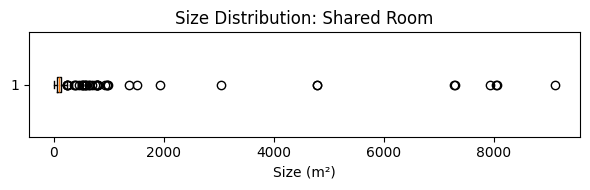

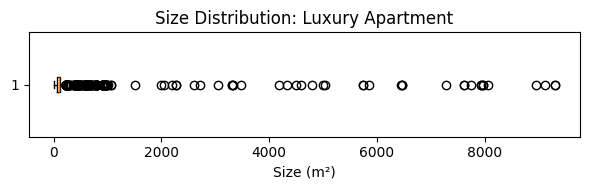

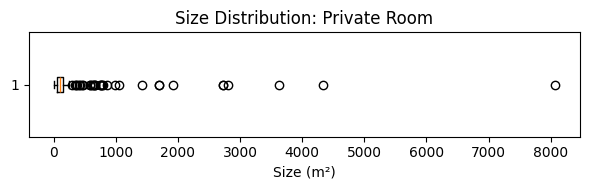

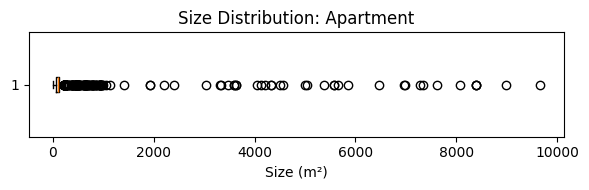

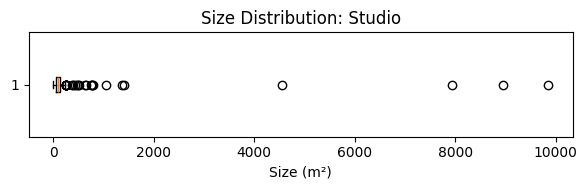

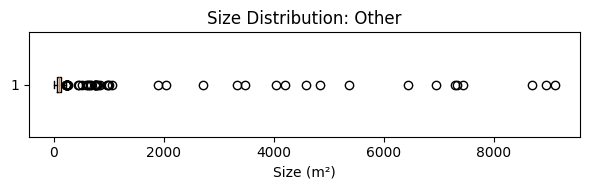

In [50]:
for cat in df['category'].unique():
    subset = df[df['category'] == cat]['total_size'].dropna()
    
    plt.figure(figsize=(6,2))
    plt.boxplot(subset, vert=False)
    plt.title(f"Size Distribution: {cat}")
    plt.xlabel("Size (m²)")
    plt.tight_layout()
    plt.show()

Since the 'total_size' data is highly inconsistent, and the medians cannot be considered reliable indicators (e.g., the median size for a private room is 100 m²), a set of plausible value thresholds was introduced to guide the cleaning process.

In [51]:
# Defining Plausible Maximum Sizes (in m²)
plausible_max = {
    'Shared Room':      15,
    'Private Room':     30,
    'Studio':           50,
    'Apartment':       200,
    'Luxury Apartment':200,
}

# Building the Mask and Replacing <NA> with False
mask = df.apply(
    lambda row: row['total_size'] > plausible_max.get(row['category'], float('inf')),
    axis=1
).fillna(False)

print(f"Flagging {mask.sum()} listings as too large for their category")

# Clearing Out Invalid Size Values
df.loc[mask, 'total_size'] = pd.NA

# Recomputing Medians by Original Category
print("New medians after category‑based cap:")
print(df.groupby('category')['total_size'].median())

Flagging 1770 listings as too large for their category
New medians after category‑based cap:
category
Apartment           85.0
Luxury Apartment    85.0
Other               94.0
Private Room        18.5
Shared Room          5.0
Studio              30.0
Name: total_size, dtype: Float64


/var/folders/vn/z9fp_k690lj6mlhd6mh2mfc40000gn/T/ipykernel_55401/3344241066.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Outlier Detection – After</p>

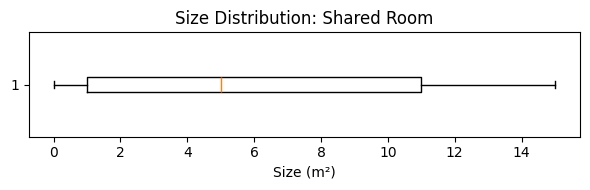

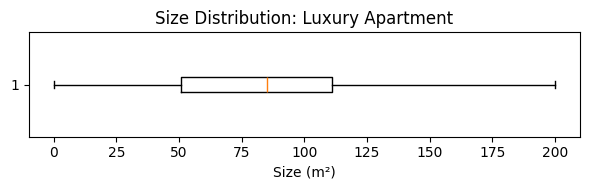

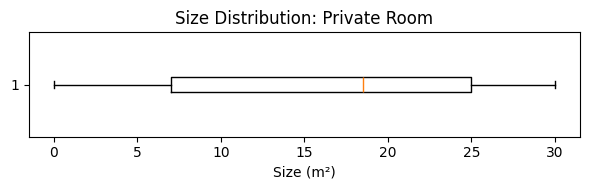

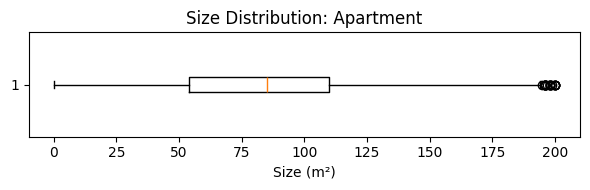

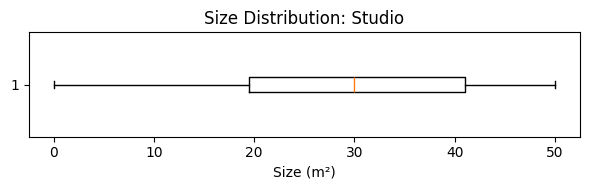

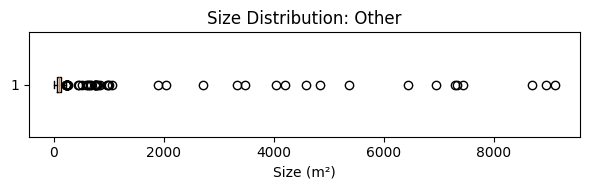

In [52]:
for cat in df['category'].unique():
    subset = df[df['category'] == cat]['total_size'].dropna()
    
    plt.figure(figsize=(6,2))
    plt.boxplot(subset, vert=False)
    plt.title(f"Size Distribution: {cat}")
    plt.xlabel("Size (m²)")
    plt.tight_layout()
    plt.show()

#### Conclusion
Introducing plausible maximum values clearly helped standardize the dataset. While some outliers remain in the apartment and luxury apartment categories, their presence is expected given the natural variation in these types of listings.

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Introducing New Column: Price per m²</p>

In [53]:
df['price_per_sqm'] = (df['price'] / df['total_size']).round(2)

# Inserting It Next to the Price Column
col = df.pop('price_per_sqm')
df.insert(4, 'price_per_sqm', col)

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Final Review and Validation</p>

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9008 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   9008 non-null   string        
 1   category               9008 non-null   object        
 2   created_at             9008 non-null   datetime64[ns]
 3   price                  9008 non-null   float64       
 4   price_per_sqm          4214 non-null   Float64       
 5   total_size             4214 non-null   Int64         
 6   furnished              5738 non-null   boolean       
 7   registration_possible  4818 non-null   boolean       
 8   washing_machine        5720 non-null   boolean       
 9   tv                     5720 non-null   boolean       
 10  balcony                2463 non-null   string        
 11  garden                 5715 non-null   string        
 12  terrace                2412 non-null   string        
dtypes: Float

In [55]:
df.sample(10)

,city,category,created_at,price,price_per_sqm,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
472,Rosiori de Vede,Luxury Apartment,2017-05-31 18:39:42,2503.98,20.87,120,False,True,True,False,<NA>,yes,<NA>
192,Rasnov,Private Room,2017-11-09 08:46:49,338.66,<NA>,<NA>,False,True,False,<NA>,yes,yes,<NA>
4281,Comanesti,Luxury Apartment,2013-01-21 13:09:02,3413.71,<NA>,<NA>,False,False,<NA>,True,<NA>,yes,yes
2422,Lupeni,Luxury Apartment,2013-10-24 06:34:58,2841.19,52.61,54,<NA>,<NA>,<NA>,True,no,yes,<NA>
1597,Afumati,Luxury Apartment,2014-11-07 00:26:11,7748.71,430.48,18,<NA>,True,True,<NA>,<NA>,<NA>,<NA>
8757,Calafat,Apartment,2015-06-20 17:48:44,806.89,<NA>,<NA>,<NA>,<NA>,False,True,<NA>,<NA>,<NA>
6267,Prejmer,Other,2016-11-13 23:43:54,157.57,78.78,2,False,False,True,True,<NA>,<NA>,<NA>
1044,Afumati,Luxury Apartment,2013-12-02 05:46:27,4559.41,45.59,100,<NA>,<NA>,False,<NA>,<NA>,yes,<NA>
5883,Dabuleni,Apartment,2015-05-02 22:36:23,722.69,5.47,132,False,False,<NA>,True,<NA>,<NA>,<NA>
4914,Modelu,Other,2015-11-08 02:27:49,158.14,0.78,202,True,True,False,<NA>,<NA>,no,yes


In [56]:
df.shape

(9008, 13)

####
#### Final Summary:

The dataset underwent a thorough cleaning process to address issues related to missing values, inconsistent data types, formatting irregularities, and outliers. Categories were standardized using price-based thresholds, and room sizes were adjusted using plausible value ranges to improve data quality and reliability.

In total, less than 7% of the dataset was dropped due to irreparable errors or inconsistencies, ensuring that the vast majority of listings were retained for further analysis. The final dataset is now well-structured, consistent, and ready for deeper exploration and visualization.

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Saving Data for Future Use</p>

In [57]:
df.to_csv('artificial_data_clean.csv', index=False)